Jonathan Tang
<br>Economic Freedom Index - Clustering Analysis
<br>Python

# Objective

In this report, we will be analyzing a dataset on the *Index of Economic Freedom*. The *Index of Economic Freedom* is an annual report published by **The Heritage Foundation** which measures the right of humans to control his or her own labor or property. Societies with more economic freedom see benefits such as greater health, GDP, development, clean environment, and less poverty. We will be using the 2019 index to cluster countries based on their overall score, as well as scores in individual categories, such as property rights, tax burden, and government integrity.

The US Department of State has commissioned us to perform data analysis on this index in order to discover patterns, trends, and cluster the countries. We hope that the information we find will help the Department of State in their understanding of other countries.  

We will be using the 2019 version of the dataset. It contains information on 186 countries and rates 16 different freedoms from a scale of 0-100. In addition, the dataset contains demographic and statistical information such as population, GDP, inflation, etc. As mentioned earlier, the dataset is provided by The Heritage Foundation and links will be provided below. 

At the end of the report, we will summarize the findings and provide concise recommendations to the US Department of State.


The 2019 dataset can be found here:
<br>https://www.kaggle.com/datasets/lewisduncan93/the-economic-freedom-index

The Heritage Foundation website:
<br>https://www.heritage.org/index/about

# Important Note

We are switching the order by doing Data Cleaning **first**, followed by Adaptation, then Data Exploration. 

We believe that cleaning and adapting our data first will help us and provide better insights in the data exploration.

# Data Cleaning

Let's begin by importing the relevant libraries and our dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1Sy5upjYVrgfzVNILjfTbC60Aps1GdRWU", encoding = "ISO-8859-1")

Next, let's clean the dataset.

Firstly, we will drop rows that have empty values in cells, as it will influence our ability to cluster countries and analyze them.

In [ ]:
df = df.dropna()

Next, we will remove columns that have irrelevant information to our study. The columns we will be removing are the following:
*   **Col 3:** `WEBNAME` - We will be using "Country Name" instead
*   **Col 25:** `Country` - This is a duplicate of "Country Name"



In [ ]:
df = df.drop(columns=["WEBNAME", "Country"])

Next, we will try to convert strings to numeric starting from **World Rank**.

In [ ]:
df.iloc[ : , -9:] = df.iloc[ : , -9:].apply(pd.to_numeric)

We now have our cleaned dataset.

# Adaptation

We would like to adapt our dataset to provide some key new insights based on existing columns.

## 1. FDI vs GDP

The first new column will be `FDI vs GDP`. It will be calculated as such:

*FDI vs. GDP = FDI Inflow (millions) / GDP (Billions ppp)*

Using this formula, we will be able to find the ratio between amount of foreign investment vs the total GDP of a country, which will be helpful when comparing countries based on how much investment they receive relative to their total production.

In [ ]:
# Append the new column FDI vs GDP per Capita
df['FDI vs GDP'] = df['FDI Inflow (Millions)'] / df['GDP (Billions PPP)']

In [ ]:
# Display 5 random rows of the new column
df[['Country Name', 'FDI vs GDP']].sample(n=5)

,Country Name,FDI vs GDP
92,Kyrgyz Republic,4.078261
84,Jordan,18.684624
7,Austria,21.905369
63,Germany,8.326053
6,Australia,37.198556


As we can see, we now have the new column `FDI vs GDP` which shows the ratio of investment to GDP. A higher number means the country has more investment relative to their total production.

## 2. Inflation plus Unemployment

The second new columns will be `Inflation vs Unemployment`. It will be calculated as such:

*Inflation plus Unemployment = Inflation (%) + Unemployment (%)*

Using this formula, we can find the combination of inflation rate and umemployment rate for a given country. This number is useful when the combination of the values is **extremely high**, which shows that the country may be facing an economic crisis.

In [ ]:
# Append the new column inflation plus unemployment
df['Inflation plus Unemployment'] = df['Inflation (%)'] + df['Unemployment (%)']

In [ ]:
# Display 5 random rows of the new column
df[['Country Name', 'Inflation plus Unemployment']].sample(n=5)

,Country Name,Inflation plus Unemployment
58,Finland,9.4
17,Bhutan,5.8
143,SÃ£o TomÃ© and PrÃ­ncipe,19.0
7,Austria,7.7
39,Costa Rica,9.7


We now have our new column: `Inflation plus Unemployment`. Note that moderate to low values are not of high importance (0-20), but high values may represent an economic crisis in the country.

# Data Exploration

Now that we have our cleaned and adapted dataset, let's explore some of the attributes of it.

## 1. Size & shape of the dataset

In [ ]:
df.shape

(173, 34)

We can see that the dataset contains **173 rows** and **34 columns**.

The original dataset had 186 rows and 32 columns. The reason for the loss of 13 rows and +2 columns were from our cleaning and adapting steps.

## 2. Display first 5 rows of data

In [ ]:
df.head()

,ï»¿CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,GDP (Billions PPP),GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),FDI vs GDP,Inflation plus Unemployment
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,...,69.6,2.5,2.9,1958,8.8,5.0,53.9,7.3,0.774425,13.8
1,2,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,...,36.0,3.9,2.5,12507,13.9,2.0,1119.1,71.2,31.086111,15.9
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,...,632.9,2.0,3.1,15237,10.0,5.6,1203.0,25.8,1.900774,15.6
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,...,190.3,0.7,2.9,6753,8.2,31.7,-2254.5,65.3,-11.847084,39.9
4,5,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,...,920.2,2.9,0.7,20876,8.7,25.7,11857.0,52.6,12.885242,34.4


We can see the first 5 rows of data above. Notice that the dataset is originally ordered in alphabetical order by `Country Name`.

## 3. Median & mean population of every country

Let's find the median & mean population of every country in 2019.

In [ ]:
# Find the median population in millions.
df['Population (Millions)'].median()

8.8

In [ ]:
# Find the mean population in millions.
df['Population (Millions)'].mean()

42.09190751445087

As we can see, the median population was **8.8 million** people, while the mean was **42 million** people. This means that population is very right-skewed as the mean is much higher than the median, which makes sense since a few countries have very high populations, such as India and China.

## 4. Descriptive statistics for 2019 Score

Let's view some descriptive statistics for **2019 Score**, which is the final aggregate score given to a country for their economic freedom.

In [ ]:
round(df['2019 Score'].describe())

count    173.0
mean      61.0
std       10.0
min       26.0
25%       55.0
50%       61.0
75%       68.0
max       90.0
Name: 2019 Score, dtype: float64

We see that the **median** and **mean** are both 61, with the lowest score recorded being a 26 and the highest being a 90. However, keep in mind that some countries are not represented here due to The Heritage Foundation not being able to collect information on them, thus resulting in empty values.

# Visualization

## 1. Scatter plot - Judical Effectiveness vs Government Integrity

Let's begin our data visualization by plotting a scatter plot comparing **Judical Effectiveness** vs **Government Integrity** of countries, then use K-means clustering to divide the countries into 3 clusters.

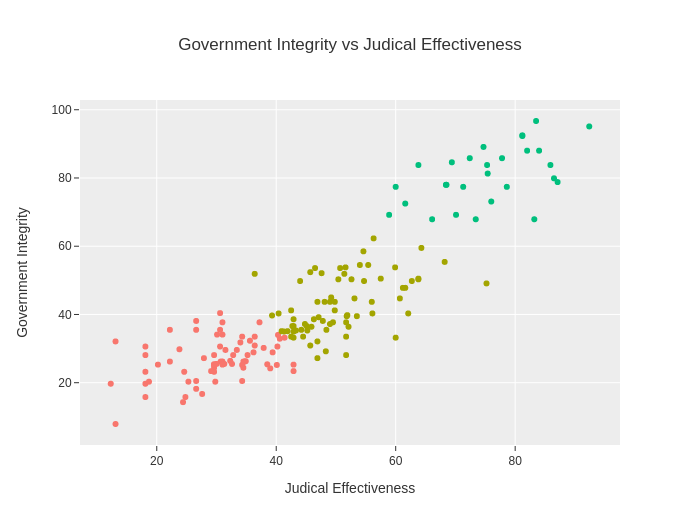

In [ ]:
# Import relevant libraries
import plotly.express as px
from sklearn.cluster import KMeans

# Run sklearn's Kmeans cluster model
X = np.c_[df[['Judical Effectiveness', 'Government Integrity']].values]
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X)

# Plot the scatter plot using plotly
colormap = np.array(['#9DD9D2', '#CDC1FF', '#F4D06F'])
fig = px.scatter(df, x='Judical Effectiveness', y='Government Integrity', template='ggplot2', color=colormap[kmeans_model.labels_], title='Government Integrity vs Judical Effectiveness',width=700,height=525)
fig.update(layout_showlegend=False)
fig.show(renderer='png')

We can see that the K-means algorithm divided the scatter plot into 3 clusters, as depicted by the colors. Overall the scatter plot has a positive correlation between Judical Effectiveness and Government Integrity.

Red represents countries with **low** judical effectiveness and government integrity, while green represents **medium** and blue represents **high**.

## 2. Bar plot of Region

Next, let's visualize the regions that are represented by the countries.

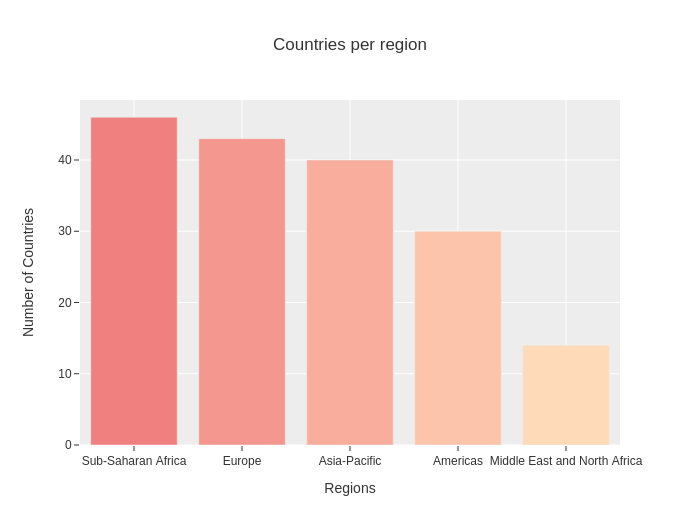

In [ ]:
# Set region labels & color palette
regions = ['Sub-Saharan Africa','Europe','Asia-Pacific','Americas','Middle East and North Africa']
palette = ['#f08080', '#f4978e', '#f8ad9d', '#fbc4ab', '#ffdab9']

# Plot bar plot
fig = px.bar(title = 'Countries per region', x = regions, y = df['Region'].value_counts(), orientation = 'v', template='ggplot2', color=regions, color_discrete_sequence=palette,width=700,height=525)
fig.update_layout(xaxis_title='Regions', yaxis_title='Number of Countries', showlegend=False)
fig.show(renderer='png')

Here we can see that in our dataset contains 5 regions of the world, sorted by highest to lowest representation.

*   Sub-Saharan Africa
*   Europe
*   Asia-Pacific
*   Americas
*   Middle East and North Africa

The bar plot visualizes the amount of countries represented in each region.



## 3. Box plot of Population

Next, let's visualize the population of the countries.

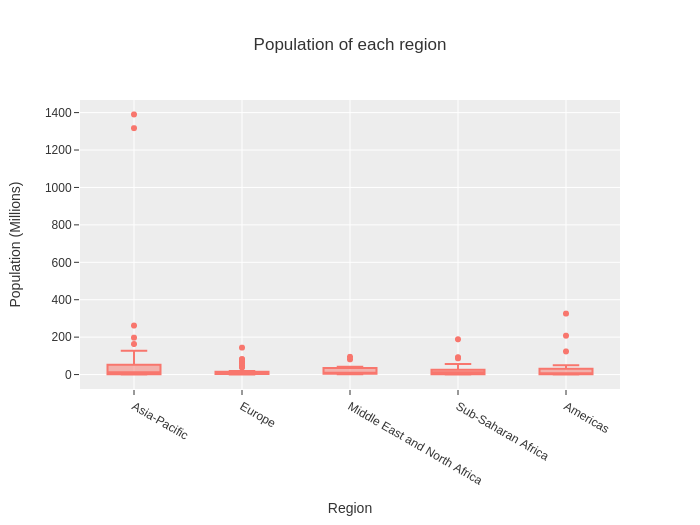

In [ ]:
# Plot box plot
fig = px.box(df, x = 'Region', y='Population (Millions)', template='ggplot2', title = 'Population of each region',width=700,height=525)
fig.show(renderer='png')

We can see that all countries fall between **0-400 million people** except for 2 -  **China** & **India**.

Let's visualize the population again, from populations 0-60 million, so that we can visualize the quartiles more easily.

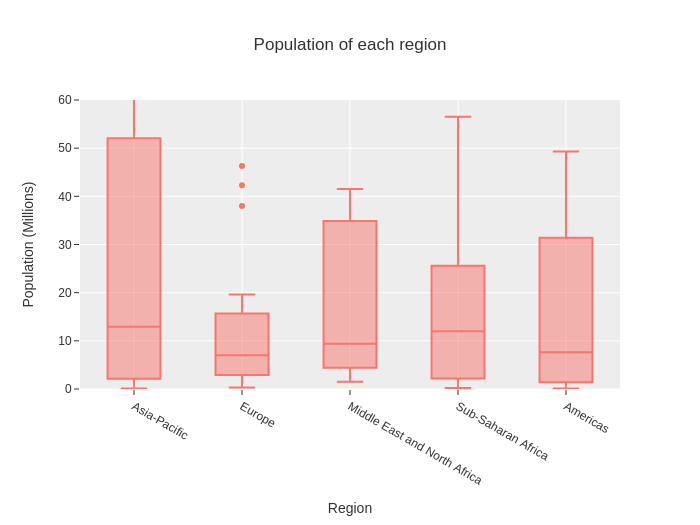

In [ ]:
# Plot box plot with y-axis max 60 million.
fig = px.box(df, x = 'Region', y='Population (Millions)', template='ggplot2', title = 'Population of each region',width=700,height=525)
fig.update_layout(yaxis_range=[0,60])
fig.show(renderer='png')

We can notice some following trends:
*   Asia has the **highest** median (12.9 million) & the highest 3rd quartile (52 million) of the 5 regions.
*   Europe has the **lowest** median (7 million) of the 5 regions.

## 4. Histogram of 2019 Score

Next, let's view a histogram of the 2019 scores. The scores will be clustered into intervals of 10 each, with each bar representing a 10 score range.

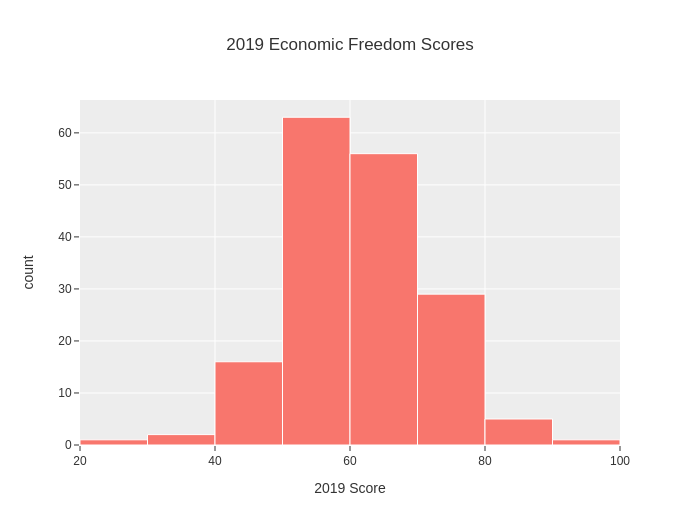

In [ ]:
# Plot histogram of 2019 economic freedom scores.
fig = px.histogram(df, x='2019 Score', template='ggplot2', nbins=10, title='2019 Economic Freedom Scores',width=700,height=525)
fig.update_traces(marker_line_width=1,marker_line_color="white")
fig.show(renderer='png')

We can notice that the centric point seems to be around 60, with 1 country in the 20-30 range and 1 country in the 90-100 range.

# Cluster Analysis

## Dendrogram

Let's visualize a dendrogram of all 173 countries, based on their **economic freedom scores**.

Remember that the countries are judged on the following **16** criteria:
*   Property Rights
*   Judical Effectiveness
*   Government Integrity
*   Tax Burden
*   Government Spending
*   Fiscal Health
*   Business Freedom
*   Labor Freedom
*   Monetary Freedom
*   Investment Freedom
*   Financial Freedom
*   Tariff Rate (%)
*   Income Tax Rate (%)
*   Corporate Tax Rate (%)
*   Tax Burden % of GDP
*   Gov't Expenditure % of GDP 

**1. Full Dendrogram**

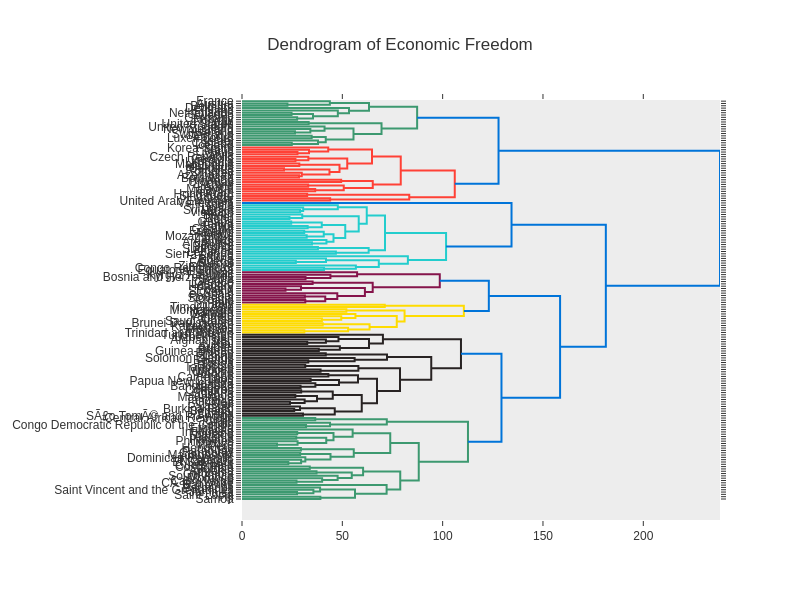

In [ ]:
# Import relevant libraries
import plotly.figure_factory as ff

# Plot full dendrogram.
X = df.iloc[:,6:22]
fig = ff.create_dendrogram(X, orientation = 'left', labels=df['Country Name'].array, color_threshold = 120)
fig.update_layout(width=800, height=600, template='ggplot2', title = 'Dendrogram of Economic Freedom')
fig.show(renderer='png')

As we can see, we have colored the dendrogram into **8 branches**, with the color threshold being at 120. 

Since the country names are hard to see with 173 countries in one graph, we will randomly select 30 countries to form a second dendrogram with for better visualization.

**2. Partial dendrogram - 30 randomly selected countries**

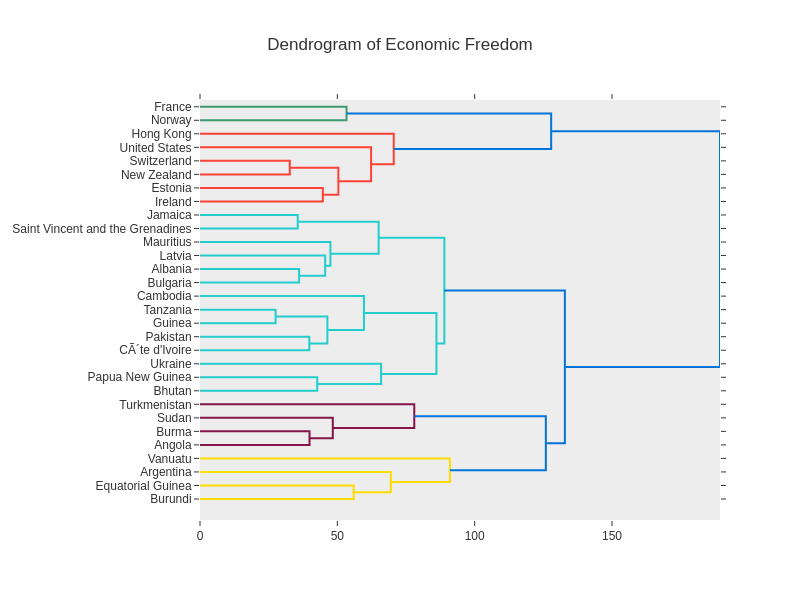

In [ ]:
# Take random sample of 30 countries
np.random.seed(8)
random_sample = df.sample(n=30)

# Plot partial dendrogram.
X = random_sample.iloc[:,6:22]
fig = ff.create_dendrogram(X, orientation = 'left', labels=random_sample['Country Name'].array, color_threshold = 120)
fig.update_layout(width=800, height=600, template='ggplot2', title = 'Dendrogram of Economic Freedom')
fig.show(renderer='png')

Here, we can see the branches and countries more clearly. We can see that the **orange** branch represents the most economically free countries, such as **Hong Kong** which ranked #1 in 2019.

# Unsupervised Clustering

## sklearn.cluster

Now, let's visualize countries' **GDP per Capita** vs **Economic Freedom Score** in clusters. We'll begin by using the elbow method to suggest the amount of clusters we should include. Then we'll plot the graph using sklearn.cluster's Kmeans method.

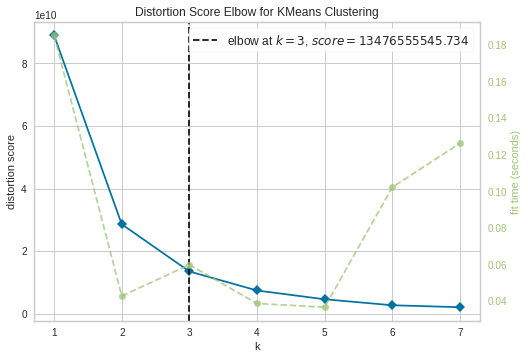

In [ ]:
# Import relevant libraries
from yellowbrick.cluster import KElbowVisualizer

# Plot the elbow method line plot.
X = np.c_[df[['2019 Score','GDP per Capita (PPP)']].values]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(X)
visualizer.show()
plt.show()

The KMeans clustering graph found the elbow point to be at **k=3 clusters**. However, after further testing on the dataset, we decided to go with **4 clusters**, which perfectly split the GDP per Capita into intervals of about 20k for each cluster.

Now, let's graph the scatter plot between **GDP per Capita** and **Economic Freedom Score**.

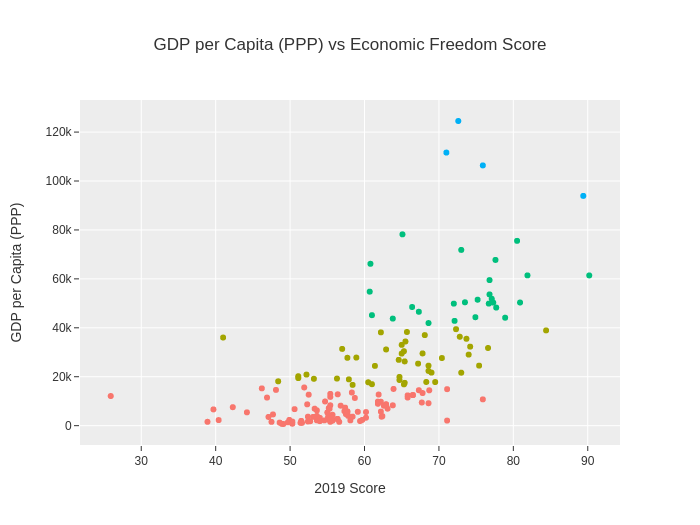

In [ ]:
# Perform cluster analysis with 4 clusters
X = np.c_[df[['2019 Score','GDP per Capita (PPP)']].values]
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(X)

# Plot the scatter plot using plotly
colormap = np.array(['#9DD9D2', '#CDC1FF', '#F4D06F', '#264653'])
fig = px.scatter(df, x='2019 Score', y='GDP per Capita (PPP)', template='ggplot2', color=colormap[kmeans_model.labels_], title='GDP per Capita (PPP) vs Economic Freedom Score',width=700,height=525)
fig.update(layout_showlegend=False)
fig.show(renderer='png')

We noticed the following observations:
*   The **1st** cluster (orange) contained the countries with the lowest GDP per capita and lowest economic freedom. Every country had between 0-20k GDP per capita.
*   The **2nd** cluster (dark green) mostly contained countries with 20k-40k GDP per capita, and slightly higher economic freedom than the first.
*   The **3rd** cluster (teal) had noticeable higher economic frreedom than the first 2 clusters, with with their GDP per capita ranging from 40k-80.
*   The **4th** cluster (blue) only contained 4 countries. They share the same attributes: high economic freedom (ranging from 70-90), high GDP per capita (94k-125k). You could say that they were all rich countries. But the most interesting thing we found was that **they were all small countries**. **Those 4 countries were Qatar, Macau, Luxembourg, and Singapore.**


# Supervised clustering

## kNN Function

Since the dataset does not come with classifications, we will use the results from the **GDP per Capita vs Economic Freedom Score** clustering set to label our data.

In [ ]:
# Set the previous sklearn.cluster clusters as the labels.
df['Cluster'] = kmeans_model.fit(X).labels_

Next, we'll make the predictKNN() function by calculating the Euclidean distance between the sample datapoint's **2019 Score** and **GDP per Capita (PPP)** and the 173 other countries.

Then we'll take the **k** nearest neighbors (by sorting lowest distance) and take the **mode** of the clusters. The cluster that appears the most will be our **predicted cluster**.

In [ ]:
import math

# Define the predictKNN function to accept k, a datapoint, and a dataframe
def predictKNN(k, datapoint, dataframe):
  cols = ['Country Name', 'Distance', 'Cluster']
  lst = []

  for i in range(len(dataframe)):
    distance = math.sqrt((datapoint[0]-dataframe.iloc[i,5])**(2)+(datapoint[1]-dataframe.iloc[i,27])**(2))
    lst.append([dataframe.iloc[i,1], distance, dataframe.iloc[i,34]])

  KNN_Analysis = pd.DataFrame(lst, columns=cols).sort_values('Distance', ascending = True).iloc[0:k,:]
  Predicted_Cluster = KNN_Analysis['Cluster'].mode().to_string(index=False)
  # KNN_Analysis = KNN_Analysis.style.set_caption(f"Predicted Cluster: {Predicted_Cluster}")
  styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "150%"),])]
  KNN_Analysis = KNN_Analysis.style.set_caption(f"Predicted Cluster: {Predicted_Cluster}").set_table_styles(styles)
  
  
  return KNN_Analysis

Now that we have our function, let's test 5 datapoint samples.

### 1. Sample 1

*   k=6
*   2019 Score = 70
*   GDP per Capita = 60,000

In [ ]:
k = 6
datapoint = [70, 60000]

predictKNN(6, datapoint, df)

,Country Name,Distance,Cluster
165,United States,499.046331,2
70,Hong Kong,1393.146453,2
149,Switzerland,1422.049792,2
135,Saudi Arabia,5223.008280,2
85,Kuwait,6163.006867,2
112,Netherlands,6365.003632,2


The predicted cluster of a country with a score of 70 and a GDP per Capita of 60,000 is 1.

### 2. Sample 2

*   k=3
*   2019 Score = 55
*   GDP per Capita = 10,000

In [ ]:
k = 3
datapoint = [55, 10000]

predictKNN(k, datapoint, df)

,Country Name,Distance,Cluster
53,Eswatini,116.000388,0
122,Paraguay,174.132823,0
55,Fiji,223.116203,0


The predicted cluster of a country with a score of 55 and a GDP per Capita of 10,000 is 0.

### 3. Sample 3

*   k=9
*   2019 Score = 62
*   GDP per Capita = 13,000

In [ ]:
k = 9
datapoint = [59, 16300]

predictKNN(k, datapoint, df)

,Country Name,Distance,Cluster
34,China,360.000500,1
39,Costa Rica,577.034392,1
46,Dominican Republic,644.003106,1
21,Brazil,697.036161,0
2,Algeria,1063.077062,0
8,Azerbaijan,1192.017181,1
137,Serbia,1300.009235,0
95,Macedonia,1386.052816,0
107,Montenegro,1436.000783,1


The predicted cluster of a country with a score of 59 and a GDP per Capita of 16,300 is 2.

### 4. Sample 4

*   k=5
*   2019 Score = 72
*   GDP per Capita = 42,800

In [ ]:
k = 5
datapoint = [72, 41300]

predictKNN(k, datapoint, df)

,Country Name,Distance,Cluster
101,Malta,645.008961,2
80,Japan,1532.000003,2
84,Korea South,1866.000024,1
113,New Zealand,2366.032493,1
57,France,2461.013661,2


The predicted cluster of a country with a score of 72 and a GDP per Capita of 41,300 is 1.

### 5. Sample 5

*   k=2
*   2019 Score = 76
*   GDP per Capita = 106,000

In [ ]:
k = 2
datapoint = [76, 106000]

predictKNN(k, datapoint, df)

,Country Name,Distance,Cluster
93,Luxembourg,374.000013,3
94,Macau,5629.002221,3


The predicted cluster of a country with a score of 76 and a GDP per Capita of 106,000 is 3.

# Findings

## Project Report

To US Department of State,

After thorough analysis of the *Index of Economic Freedom*, 2019 report published by The Heritage Foundation, we would like to present our findings in this report. 

As mentioned in our introduction, the *Index of Economic Freedom* is an annual report which attempts to measure the economic freedom of individuals and businesses across every country in the world. The 2019 edition included 186 countries which were judged across 16 freedoms, including **Property Rights**, **Government Effectiveness**, **Tax Burden**, etc. from a scale of 0-100. The final score is then given as a weighted average of the 16 criteria.

In the Adaptation section, we appended two new columns to the data: **FDI vs GDP** and **Inflation plus Unemployment**. FDI vs GDP measured the ratio of foreign investment against the total GDP of a country, which is useful in seeing what proportion of a country's production is defined by foreign investments. Inflation plus Unemployment measures when a country can be undergoing an economic crisis, such as Venezuela from 2017-2019, which had high rates of inflation and unemployment.

In the Data Exploration section, we discovered attributes about the dataset. The cleaned dataset contained 34 columns with 173 countries. The median population of each country was 8.8 million people, while the mean population was 42 million people. This implies that the population of countries is right-skewed, with a few high-population countries heavily increasing the average. Next, we analyzed the descriptive staistics for 2019 score and found that the median and mean are both 61, with the scores ranging from 26-90. The score of 26 belonged to Venezuela, while the score of 90 belonged to Singapore.

In the Visualization section, we plotted a scatter plot of **Government Integrity** vs **Judicial Effectiveness** to see if we could find a trend.

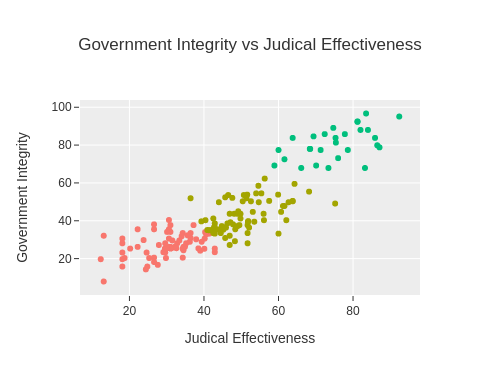

In [ ]:
X = np.c_[df[['Judical Effectiveness', 'Government Integrity']].values]
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X)

colormap = np.array(['#9DD9D2', '#CDC1FF', '#F4D06F'])
fig = px.scatter(df, x='Judical Effectiveness', y='Government Integrity', template='ggplot2', color=colormap[kmeans_model.labels_], title='Government Integrity vs Judical Effectiveness',width=500,height=375)
fig.update(layout_showlegend=False)
fig.show(renderer='png')

We found a positive correlation between the two variables, meaning that countries that have high Judicial Effectiveness typically also have higher Government Integrity.

We then compared the populations of the countries in each region using a boxplot to spot any trends.

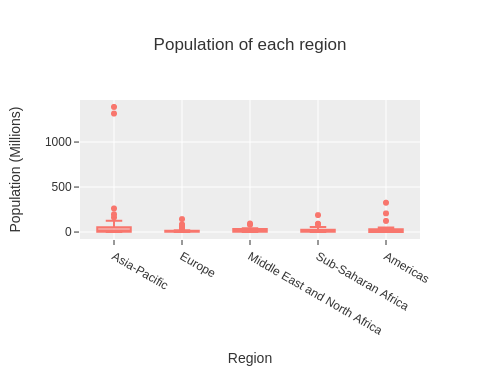

In [ ]:
fig = px.box(df, x = 'Region', y='Population (Millions)', template='ggplot2', title = 'Population of each region',width=500,height=375)
fig.show(renderer='png')

In the full boxplot, we could see that China & India had much higher populations than any other country, so we decided to redo the boxplot and only show countries with up to 60 million population.

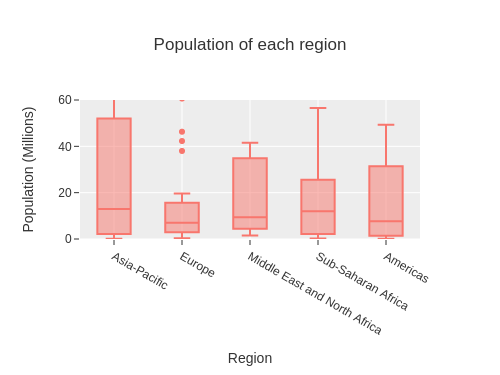

In [ ]:
fig = px.box(df, x = 'Region', y='Population (Millions)', template='ggplot2', title = 'Population of each region',width=500,height=375)
fig.update_layout(yaxis_range=[0,60])
fig.show(renderer='png')

We noticed that the **Asia** region had the highest median population, followed by **Sub-Saharan Africa**. **Europe** had the least median population.

Finally, we have a visualization of the scores that each country received in 2019, using a histogram.

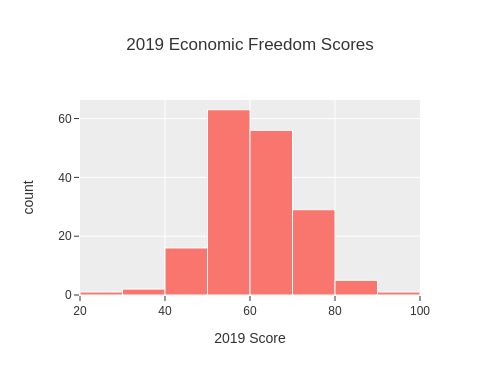

In [ ]:
fig = px.histogram(df, x='2019 Score', template='ggplot2', nbins=10, title='2019 Economic Freedom Scores',width=500,height=375)
fig.update_traces(marker_line_width=1,marker_line_color="white")
fig.show(renderer='png')

In our cluster analysis section, we performed hierarchical clustering using both a full and partial dendrogram. The countries were clustered by similarity of scores in the 16 freedom criteria. Below is the partial dendrogram using 30 randomly selected countries.

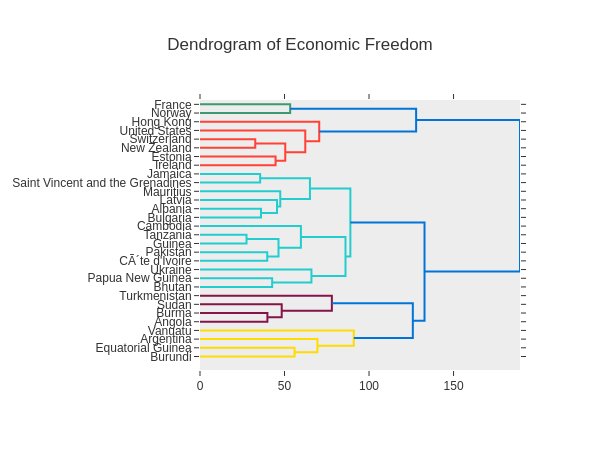

In [ ]:
np.random.seed(8)
random_sample = df.sample(n=30)

X = random_sample.iloc[:,6:22]
fig = ff.create_dendrogram(X, orientation = 'left', labels=random_sample['Country Name'].array, color_threshold = 120)
fig.update_layout(width=600, height=450, template='ggplot2', title = 'Dendrogram of Economic Freedom')
fig.show(renderer='png')

We can see that countries that scored similarly on the criteria were clustered togther, such as **Hong Kong** and **United States** both scoring high on almost every category. Countries such as **Sudan**, **Burma**, and **Angola** which had low economic freedom scores were also clustered together in our dendrogram.

Next, we performed unsupervised clustering using the K-means method. In a scatter plot of **2019 Economic Freedom Score** and **GDP per Capita (PPP)**, we compared the correlation and clusters of each country.

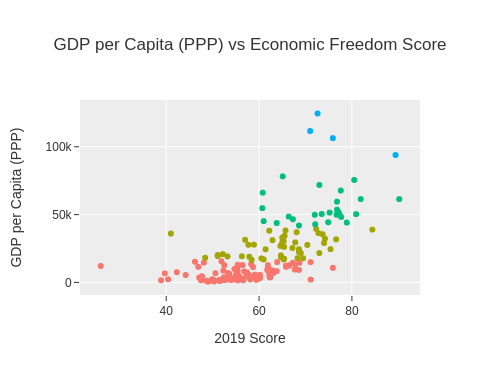

In [ ]:
X = np.c_[df[['2019 Score','GDP per Capita (PPP)']].values]
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(X)

colormap = np.array(['#9DD9D2', '#CDC1FF', '#F4D06F', '#264653'])
fig = px.scatter(df, x='2019 Score', y='GDP per Capita (PPP)', template='ggplot2', color=colormap[kmeans_model.labels_], title='GDP per Capita (PPP) vs Economic Freedom Score',width=500,height=375)
fig.update(layout_showlegend=False)
fig.show(renderer='png')

We found that economic freedom and GDP per capita were moderately positively correlated. The countries were split into 4 clusters, with the blue clusters representing 4 rich, small countries with high economic freedom. The green countries represented typically first-world countries with high GDP per Capita and economic freedom. The brown and orange clusters followed next, which were countries with lower GDP per Capita and economic freedom.

Finally, we created a function called predictKNN() to use the k-nearest neighbors method to predict which countries and clusters were most similar to a given data point. The inputs were k (number of nearest neighbors), 2019 Score, and GDP per Capita. For example, for a country with 72 Economic Freedom Score and 41,300 GDP per Capita, let's predict the cluster and find the 5 most similar countries.

In [ ]:
k = 5
datapoint = [72, 41300]

predictKNN(k, datapoint, df)

,Country Name,Distance,Cluster
101,Malta,645.008961,2
80,Japan,1532.000003,2
84,Korea South,1866.000024,1
113,New Zealand,2366.032493,1
57,France,2461.013661,2


As we can see, the predicted cluster was 2, with the most similar countries being Malta and Japan.

In conclusion, we were able to cluster the 186 countries based on their similarity in economic freedom, as well as GDP per Capita. We were also able to predict the most similar countries by providing attribute inputs. We noticed a moderate positive correlation between Economic Freedom Score and GDP per Capita, but there were many exceptions and variances.

Jonathan Tang